<a href="https://colab.research.google.com/github/RishikaSamala/IU_AML/blob/main/Mnist_hand_digit_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import torch
import torchvision
import torch.nn.functional as F
import matplotlib.pyplot as plt
from time import time
from torch.autograd import Variable
from torchvision import datasets, transforms
from torch import nn, optim

In [ ]:
#train_data = datasets.MNIST('E://rishika//work' ,train=True,download=True,transform=transforms.ToTensor())
train_data = torchvision.datasets.MNIST('content/sample_data',train=True,download=True,transform=transforms.ToTensor())

In [6]:
#test_data = datasets.MNIST('E://rishika//work' ,train=False,download=True,transform=transforms.ToTensor())
test_data = torchvision.datasets.MNIST('content/sample_data',train=False,download=True,transform=transforms.ToTensor())

In [7]:
trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)

In [8]:
train_iter = iter(trainloader)
(images,labels) = train_iter.next()

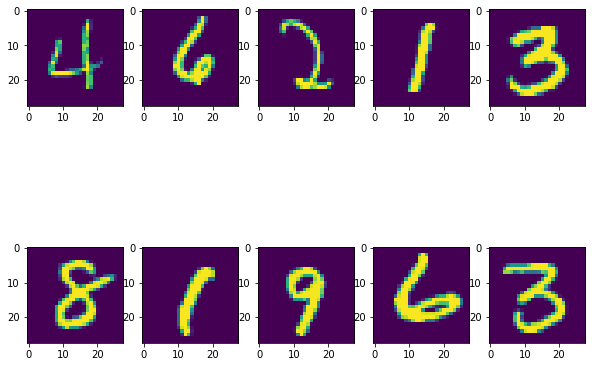

In [9]:
plt.figure(figsize=(10,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(images[i][0])
plt.show()

In [64]:
cnn.conv2.weight.shape

torch.Size([12, 12, 4, 4])

In [36]:
torch.nn.parameter.Parameter(torch.randn(8,8,1)).shape

torch.Size([8, 8, 1])

In [66]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 12, kernel_size=8)
        self.conv1.weight = self.weight_init_xavier_cnn(12,1,8)
        self.conv2 = nn.Conv2d(12, 12, kernel_size=4)
        self.conv2.weight = self.weight_init_xavier_cnn(12,12,4)
        self.fc1 = nn.Linear(18*18*12,30)
        self.fc1.weight = self.weight_init_xavier_fc(30,3888)
        self.fc2 = nn.Linear(30,10)
        self.fc2.weight = self.weight_init_xavier_fc(10,30)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(x.size()[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x
 
    def weight_init_xavier_cnn(self,feature_maps_num,input_feature_maps,kernel_size): 
      weight = nn.init.xavier_uniform_(torch.randn(feature_maps_num,input_feature_maps,kernel_size,kernel_size), gain=1.0)
      return nn.parameter.Parameter(weight)

    def weight_init_xavier_fc(self,out_nodes,inp_nodes):
      weight = nn.init.xavier_uniform_(torch.randn(out_nodes,inp_nodes), gain=1.0)
      return nn.parameter.Parameter(weight)

    

cnn = CNN()
print(cnn)

CNN(
  (conv1): Conv2d(1, 12, kernel_size=(8, 8), stride=(1, 1))
  (conv2): Conv2d(12, 12, kernel_size=(4, 4), stride=(1, 1))
  (fc1): Linear(in_features=3888, out_features=30, bias=True)
  (fc2): Linear(in_features=30, out_features=10, bias=True)
)


In [67]:
epochs = 5
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters())
for epoch in range(epochs):
    for i,(images,labels) in enumerate(trainloader):
        
        images = images.reshape(-1,1,28,28)
        outputs = cnn(images)
        loss = loss_func(outputs,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Epoch : {} [ \t Loss:{:.3f}%'.format(epoch,loss.item()))
    

Epoch : 0 [ 	 Loss:0.136%
Epoch : 1 [ 	 Loss:0.004%
Epoch : 2 [ 	 Loss:0.061%
Epoch : 3 [ 	 Loss:0.007%
Epoch : 4 [ 	 Loss:0.007%


In [12]:
weight1 = torch.randn(1*8*8,1)
torch.nn.init.xavier_uniform_(weight1, gain=1.0)

tensor([[-0.2752],
        [-0.1934],
        [ 0.1096],
        [ 0.1790],
        [-0.1405],
        [-0.0734],
        [-0.0263],
        [-0.2053],
        [ 0.1857],
        [-0.1922],
        [-0.0938],
        [ 0.2536],
        [-0.1598],
        [ 0.2122],
        [ 0.2230],
        [-0.1202],
        [ 0.2259],
        [ 0.1193],
        [ 0.2784],
        [ 0.0043],
        [-0.0190],
        [-0.1017],
        [-0.1061],
        [ 0.2379],
        [ 0.0653],
        [-0.2950],
        [-0.2062],
        [-0.2365],
        [ 0.0995],
        [ 0.1744],
        [ 0.0126],
        [-0.2147],
        [-0.1156],
        [-0.0060],
        [-0.1391],
        [ 0.1855],
        [ 0.1460],
        [ 0.1516],
        [ 0.1907],
        [ 0.2610],
        [ 0.0483],
        [-0.0840],
        [-0.1119],
        [-0.0733],
        [-0.0059],
        [ 0.1570],
        [ 0.0592],
        [-0.1772],
        [-0.0916],
        [ 0.1484],
        [-0.1493],
        [ 0.2017],
        [-0.

In [ ]:
def xavier(m,h):
  return torch.Tensor(m,h).uniform_(-1,1)*math.sqrt(6./(m+h))
  
x=torch.randn(1*12*12)
for i in range(100):
  a = xavier(144*144)

